In [1]:
ls 

Conics.ipynb           ellipseDataAnal.ipynb  posData_1.csv
ellSun.csv             ellpl1.csv             posData_2.csv
ellipseData.csv        hyperBolicData.csv     testing.ipynb
ellipseData1.csv       posData.csv


In [2]:
import numpy as np # type: ignore

In [7]:
import pandas as pd # type: ignore

In [65]:
raw = pd.read_csv('posData.csv')

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
raw.head()

,clk,RposX,RposY,RvelX,RvelY,RaccX,RaccY,RboostAccX,RboostAccY,P1PosX,P1PosY,P1velX,P1velY,P2PosX,P2PosY,P2velX,P2velY,P3PosX,P3PosY,P3velX,P3velY,P4PosX,P4PosY,P4velX,P4velY
0,129000,100.013798,5.543432,-0.000003,0.000043,-4.530123e-09,8.318025e-10,-4.509075e-09,8.343968e-10,99.850750,5.461470,0,0.000042,-3.704288,199.965693,-0.00003,2.385131e-08,-149.905181,200.071079,-0.000022,-0.000016,0,0,0,0
1,129001,100.013795,5.543475,-0.000003,0.000043,-4.530125e-09,8.317921e-10,-4.509077e-09,8.343864e-10,99.850748,5.461513,0,0.000042,-3.704318,199.965692,-0.00003,2.385131e-08,-149.905203,200.071063,-0.000022,-0.000016,0,0,0,0
2,129002,100.013793,5.543518,-0.000003,0.000043,-4.530127e-09,8.317818e-10,-4.509079e-09,8.343761e-10,99.850746,5.461555,0,0.000042,-3.704348,199.965692,-0.00003,2.385131e-08,-149.905224,200.071047,-0.000022,-0.000016,0,0,0,0
3,129003,100.013790,5.543561,-0.000003,0.000043,-4.530129e-09,8.317714e-10,-4.509080e-09,8.343658e-10,99.850743,5.461597,0,0.000042,-3.704378,199.965691,-0.00003,2.385131e-08,-149.905246,200.071031,-0.000022,-0.000016,0,0,0,0
4,129004,100.013787,5.543603,-0.000003,0.000043,-4.530130e-09,8.317611e-10,-4.509082e-09,8.343555e-10,99.850741,5.461639,0,0.000042,-3.704408,199.965690,-0.00003,2.385131e-08,-149.905267,200.071015,-0.000022,-0.000016,0,0,0,0


In [66]:
## angle between relative position and booster acc
s1 = pd.Series([(raw.RposX - raw.P1PosX),(raw.RposY - raw.P1PosY)])
s2 = pd.Series([(raw.RboostAccX),(raw.RboostAccY)])
dot_product = s1.dot(s2)
norm_s1 = np.linalg.norm(s1)
norm_s2 = np.linalg.norm(s2)
cos_angle = dot_product / (norm_s1 * norm_s2)
angle_rad = np.arccos(cos_angle)

In [67]:
angle_rad

0        1.615928
1        1.615925
2        1.615922
3        1.615919
4        1.615916
           ...   
19995         NaN
19996         NaN
19997         NaN
19998         NaN
19999         NaN
Length: 20000, dtype: float64

In [59]:
cos_angle

0       -0.239276
1       -0.239277
2       -0.239278
3       -0.239279
4       -0.239279
           ...   
19995         NaN
19996         NaN
19997         NaN
19998         NaN
19999         NaN
Length: 20000, dtype: float64

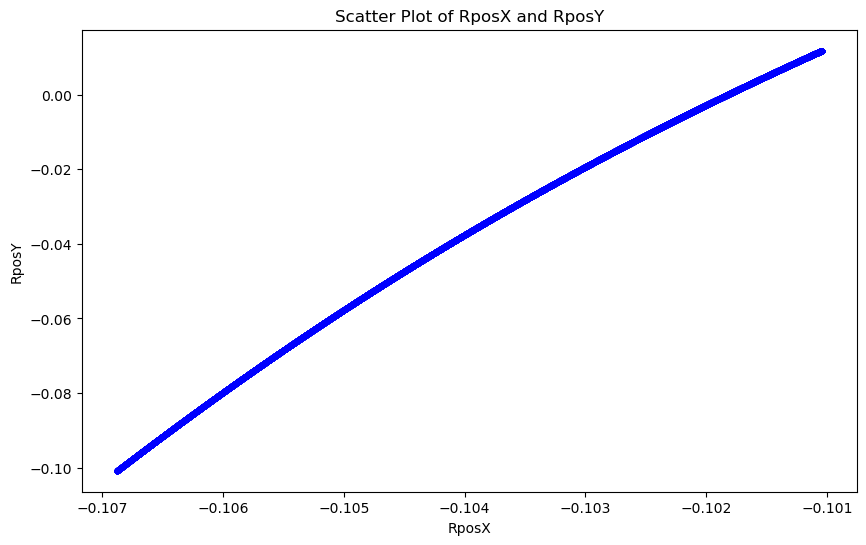

In [71]:
import matplotlib.pyplot as plt

# Extract the 'RposX' and 'RposY' columns from the 'raw' table
rposx = raw['RposX'] -  raw['P1PosX']
rposy = raw['RposY'] - raw['P1PosY']

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(rposx, rposy, s=10, c='blue')
plt.xlabel('RposX')
plt.ylabel('RposY')
plt.title('Scatter Plot of RposX and RposY')
plt.show()